# Ejercicio

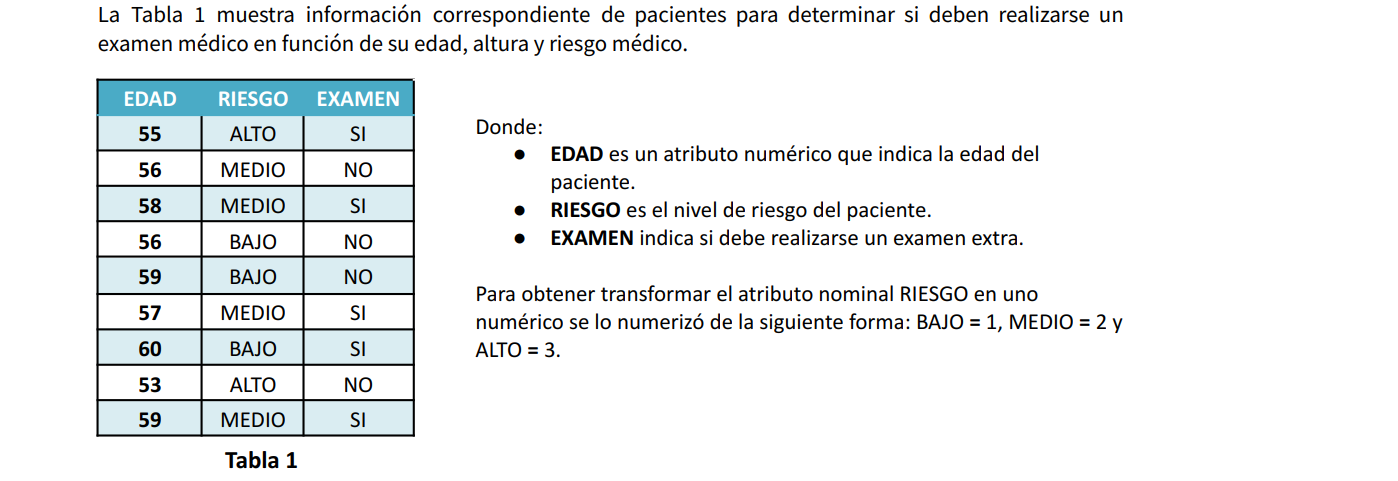

In [ ]:
import numpy as np

# Datos de entrenamiento
datos_entrena = [
    [55, 'ALTO',  'SI'],  # [edad, riesgo, examen]
    [56, 'MEDIO', 'NO'],
    [58, 'MEDIO', 'SI'],
    [56, 'BAJO',  'NO'],
    [59, 'BAJO',  'NO'],
    [57, 'MEDIO', 'SI'],
    [60, 'BAJO',  'SI'],
    [53, 'ALTO',  'NO'],
    [59, 'MEDIO', 'SI']
]

# para numerización de riesgo y examen
riesgo_dict = {'BAJO': 1, 'MEDIO': 2, 'ALTO': 3}

# Nota: como no entrenamos el perceptrón no hay que asumir que 'SI' es 1 o 0
examen_dict = {'SI': 1, 'NO': 0}




---


### Correlación
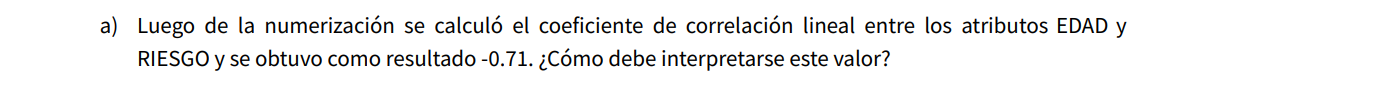

In [ ]:
# Separar la tabla de datos de originales en listas con los valores de atributos
# Lista de edades
edades = [datos[0] for datos in datos_entrena]

# lista de riesgo numerizada. Utiliza un diccionario que establece un valor numerico para cada valor nominal
riesgos = [riesgo_dict[datos[1]] for datos in datos_entrena]

# Calcular la matriz de correlación
corr_matrix = np.corrcoef(edades, riesgos)

print('Matriz de Correlación:\n', corr_matrix, '\n')

# Obtener el coeficiente de correlación entre edad y riesgo
corr_edad_riesgo = corr_matrix[0, 1]
print(f"Coeficiente de correlación entre edad y riesgo: {corr_edad_riesgo:.4f}")

Matriz de Correlación:
 [[ 1.         -0.71509694]
 [-0.71509694  1.        ]] 

Coeficiente de correlación entre edad y riesgo: -0.7151




---


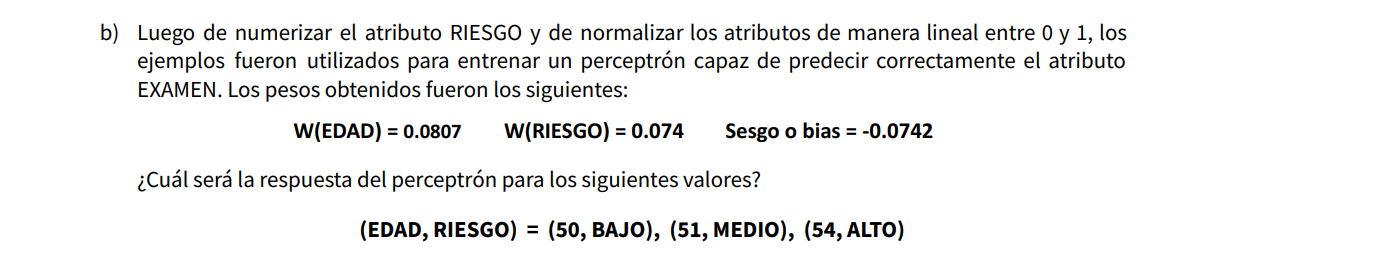

In [ ]:
# Para normalizar
edad_min = min(edades)
edad_max = max(edades)
riesgo_min = min(riesgos)
riesgo_max = max(riesgos)

# Pesos del perceptrón entrenado
# pesos para examen SI=1, NO=0. OJO! si no se especifica, hay que probar si SI=0 o SI=1!
(w_edad, w_riesgo, sesgo) = (0.0807, 0.074, -0.0742)

# Función de funciones para
def activacion_umbral(x):
    return 1 if x >= 0 else 0

def predecir(edad, riesgo):

    salida = w_edad * edad + w_riesgo * riesgo + sesgo
    prediccion = activacion_umbral(salida)

    return prediccion

### Prueba para predicción del examen

In [ ]:
# Evaluar los datos de entrenamiento
correctas = 0
print(f"|Edad|Riesgo|Examen|Pred|") # encabezado para mostrar la tabla

# recorre cada dato de la lista de los datos
for edad, riesgo_txt, examen_txt in datos_entrena:
    # numerizacion de caracteristicas, convierte los valores nominales a numéricos
    riesgo = riesgo_dict[riesgo_txt]
    examen = examen_dict[examen_txt]

    # normalizacion Min-Max
    edad_norm = (edad - edad_min) / (edad_max - edad_min)
    riesgo_norm = (riesgo - riesgo_min) / (riesgo_max - riesgo_min)

    prediccion = predecir(edad_norm, riesgo_norm)
    if prediccion == examen:
        correctas += 1

    # imprime para cada ejemplo el valor a predecir y la predicción
    print(f"|{edad:^4}|{riesgo_txt:^6}|{examen:^6}|{prediccion:^4}|")

print(f"\nExactitud (accuracy) en datos de entrenamiento: {correctas / len(datos_entrena):.2f}")

|Edad|Riesgo|Examen|Pred|
| 55 | ALTO |  1   | 1  |
| 56 |MEDIO |  0   | 0  |
| 58 |MEDIO |  1   | 1  |
| 56 | BAJO |  0   | 0  |
| 59 | BAJO |  0   | 0  |
| 57 |MEDIO |  1   | 1  |
| 60 | BAJO |  1   | 1  |
| 53 | ALTO |  0   | 0  |
| 59 |MEDIO |  1   | 1  |

Exactitud (accuracy) en datos de entrenamiento: 1.00


### Predicción para pacientes nuevos

In [ ]:
datos_nuevos = [
    [50, 'BAJO'],  # [edad, riesgo]
    [51, 'MEDIO'],
    [54, 'ALTO']
]

# Evaluar los datos nuevos
print(f"|Edad|Riesgo|Pred|")
for edad, riesgo_txt in datos_nuevos:
    # numerizacion
    riesgo = riesgo_dict[riesgo_txt]

    # normalizacion
    edad_norm = (edad - edad_min) / (edad_max - edad_min)
    riesgo_norm = (riesgo - riesgo_min) / (riesgo_max - riesgo_min)

    prediccion = predecir(edad_norm, riesgo_norm)

    print(f"|{edad:^4}|{riesgo_txt:^6}|{prediccion:^4}|")

|Edad|Riesgo|Pred|
| 50 | BAJO | 0  |
| 51 |MEDIO | 0  |
| 54 | ALTO | 1  |
